# Attributes Information
The attributes are as follows:
    
Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [1]:
#Importing the neccesary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
hamo=pd.read_csv('energydata.csv')

In [3]:
hamo.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
type(hamo)

pandas.core.frame.DataFrame

In [5]:
#Renaming the columns
column_names={'T1':'Temperature_in_kitchen_area(c)','RH_1':'Humidity_in_kitchen(%)','T2':'Temperature_in_living_room_area(c)',
             'RH_2':'Humidity_in_living_room_area(%)','T3':'Temperature_in_laundry_room_area(c)',
              'RH_3':'Humidity_in_laundry_room_area(%)','T4':'Temperature_in_office_room(c)','RH_4':'Humidity_in_office_room(%)',
              'T5':'Temperature_in_bathroom(c)','RH_5':'Humidity_in_bathroom(%)',
              'T6':'Temperature_outside_the_building(north_side)(c)','RH_6':'Humidity_outside_the_building(north_side)(%)',
             'T7':'Temperature_in_ironing_room(c)','RH_7':'Humidity_in_ironing_room(%)',
             'T8':'Temperature_in_teenager_room_2(c)','RH_8':'Humidity_in_teenager_room_2(%)',
             'T9':'Temperature_in_parents_room(c)','RH_9':'Humidity_in_parents_room(%)',
              'T_out':'Temperature_outside(from_chievres_weather_station)(c)','RH_out':'Humidity_outside(from_chievres_weather_station)(%)',
             'rv1':'Random_variable_1','rv2':'Random_variable_2'}

In [6]:
hamo=hamo.rename(columns=column_names)

In [7]:
#Checking for info and if there is a missing value in the dataset
hamo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date                                                     19735 non-null object
Appliances                                               19735 non-null int64
lights                                                   19735 non-null int64
Temperature_in_kitchen_area(c)                           19735 non-null float64
Humidity_in_kitchen(%)                                   19735 non-null float64
Temperature_in_living_room_area(c)                       19735 non-null float64
Humidity_in_living_room_area(%)                          19735 non-null float64
Temperature_in_laundry_room_area(c)                      19735 non-null float64
Humidity_in_laundry_room_area(%)                         19735 non-null float64
Temperature_in_office_room(c)                            19735 non-null float64
Humidity_in_office_room(%)                               19735 non-null float64
Temperature_in_b

In [8]:
hamo.describe()

,Appliances,lights,Temperature_in_kitchen_area(c),Humidity_in_kitchen(%),Temperature_in_living_room_area(c),Humidity_in_living_room_area(%),Temperature_in_laundry_room_area(c),Humidity_in_laundry_room_area(%),Temperature_in_office_room(c),Humidity_in_office_room(%),...,Temperature_in_parents_room(c),Humidity_in_parents_room(%),Temperature_outside(from_chievres_weather_station)(c),Press_mm_hg,Humidity_outside(from_chievres_weather_station)(%),Windspeed,Visibility,Tdewpoint,Random_variable_1,Random_variable_2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
#Dropping the date and light columns
ham=hamo.drop(['date','lights'], axis=1)
ham.head()

,Appliances,Temperature_in_kitchen_area(c),Humidity_in_kitchen(%),Temperature_in_living_room_area(c),Humidity_in_living_room_area(%),Temperature_in_laundry_room_area(c),Humidity_in_laundry_room_area(%),Temperature_in_office_room(c),Humidity_in_office_room(%),Temperature_in_bathroom(c),...,Temperature_in_parents_room(c),Humidity_in_parents_room(%),Temperature_outside(from_chievres_weather_station)(c),Press_mm_hg,Humidity_outside(from_chievres_weather_station)(%),Windspeed,Visibility,Tdewpoint,Random_variable_1,Random_variable_2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
#Normalising the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
normalised_ham=pd.DataFrame(scaler.fit_transform(ham),columns=ham.columns)
normalised_ham.head()

,Appliances,Temperature_in_kitchen_area(c),Humidity_in_kitchen(%),Temperature_in_living_room_area(c),Humidity_in_living_room_area(%),Temperature_in_laundry_room_area(c),Humidity_in_laundry_room_area(%),Temperature_in_office_room(c),Humidity_in_office_room(%),Temperature_in_bathroom(c),...,Temperature_in_parents_room(c),Humidity_in_parents_room(%),Temperature_outside(from_chievres_weather_station)(c),Press_mm_hg,Humidity_outside(from_chievres_weather_station)(%),Windspeed,Visibility,Tdewpoint,Random_variable_1,Random_variable_2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [11]:
normalised_ham.corr()

,Appliances,Temperature_in_kitchen_area(c),Humidity_in_kitchen(%),Temperature_in_living_room_area(c),Humidity_in_living_room_area(%),Temperature_in_laundry_room_area(c),Humidity_in_laundry_room_area(%),Temperature_in_office_room(c),Humidity_in_office_room(%),Temperature_in_bathroom(c),...,Temperature_in_parents_room(c),Humidity_in_parents_room(%),Temperature_outside(from_chievres_weather_station)(c),Press_mm_hg,Humidity_outside(from_chievres_weather_station)(%),Windspeed,Visibility,Tdewpoint,Random_variable_1,Random_variable_2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
Temperature_in_kitchen_area(c),0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Humidity_in_kitchen(%),0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Temperature_in_living_room_area(c),0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Humidity_in_living_room_area(%),-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Temperature_in_laundry_room_area(c),0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Humidity_in_laundry_room_area(%),0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
Temperature_in_office_room(c),0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Humidity_in_office_room(%),0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
Temperature_in_bathroom(c),0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


In [12]:
#Selecting the features and target columns

X=normalised_ham[['Temperature_in_kitchen_area(c)',
       'Humidity_in_kitchen(%)', 'Temperature_in_living_room_area(c)',
       'Humidity_in_living_room_area(%)',
       'Temperature_in_laundry_room_area(c)',
       'Humidity_in_laundry_room_area(%)', 'Temperature_in_office_room(c)',
       'Humidity_in_office_room(%)', 'Temperature_in_bathroom(c)',
       'Humidity_in_bathroom(%)',
       'Temperature_outside_the_building(north_side)(c)',
       'Humidity_outside_the_building(north_side)(%)',
       'Temperature_in_ironing_room(c)', 'Humidity_in_ironing_room(%)',
       'Temperature_in_teenager_room_2(c)', 'Humidity_in_teenager_room_2(%)',
       'Temperature_in_parents_room(c)', 'Humidity_in_parents_room(%)',
       'Temperature_outside(from_chievres_weather_station)(c)', 'Press_mm_hg',
       'Humidity_outside(from_chievres_weather_station)(%)', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Random_variable_1', 'Random_variable_2']]
y=normalised_ham['Appliances']

# Training the model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Prediction

In [18]:
predictions=lm.predict(X_test)

In [19]:
predictions

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


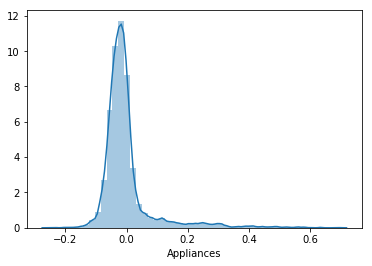

In [20]:
sns.distplot((y_test-predictions))

# Evaluations

In [21]:
from sklearn import metrics

In [22]:
mae=metrics.mean_absolute_error(y_test,predictions)
round(mae,2)

0.05

In [23]:
mse=metrics.mean_squared_error(y_test,predictions)
round(mae,2)

0.05

In [24]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,predictions))
round(rmse,3)

0.088

In [25]:
rss=np.sum(np.square(y_test,predictions))
round(rss,2)

92.98

In [26]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,predictions)
round(r2_score,2)

0.21

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Predicted Values')

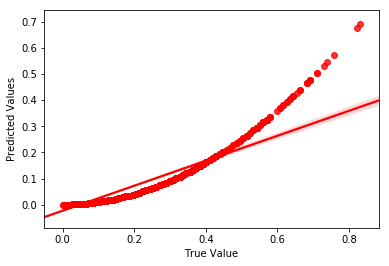

In [27]:
sns.regplot(x=y_test,y=predictions, color='red')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')

In [28]:
#training a ridge regression model with an alpha value of 0.4
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.4)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,predictions))
round(rmse,3)

0.085

In [30]:
#training a lasso regression model with an alpha value of 0.001
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,predictions))
round(rmse,3)

0.085

In [32]:
def get_weights_normalised_ham(lm,feat,col_name):
    weights=pd.Series(lm.coef_,feat.columns).sort_values()
    weights_normalised_ham=pd.DataFrame(weights).reset_index()
    weights_normalised_ham.columns=['Features',col_name]
    weights_normalised_ham[col_name].round(3)
    return weights_normalised_ham

linear_model_weights=get_weights_normalised_ham(lm,X_train,'Linear_Model_Weights')
ridge_weights=get_weights_normalised_ham(ridge_reg,X_train,'Ridge_Weights')
lasso_weights=get_weights_normalised_ham(lasso_reg,X_train,'Lasso_Weights')

final_weights=pd.merge(linear_model_weights,ridge_weights,on='Features')
final_weights=pd.merge(final_weights,lasso_weights,on='Features')

final_weights

,Features,Linear_Model_Weights,Ridge_Weights,Lasso_Weights
0,Humidity_in_living_room_area(%),-0.456698,-0.411071,-0.000000
1,Temperature_outside(from_chievres_weather_stat...,-0.321860,-0.262172,0.000000
2,Temperature_in_living_room_area(c),-0.236178,-0.201397,0.000000
3,Temperature_in_parents_room(c),-0.189941,-0.188916,-0.000000
4,Humidity_in_teenager_room_2(%),-0.157595,-0.156830,-0.000110
5,Humidity_outside(from_chievres_weather_station...,-0.077671,-0.054724,-0.049557
6,Humidity_in_ironing_room(%),-0.044614,-0.045977,-0.000000
7,Humidity_in_parents_room(%),-0.039800,-0.041367,-0.000000
8,Temperature_in_bathroom(c),-0.015657,-0.019853,-0.000000
9,Temperature_in_kitchen_area(c),-0.003281,-0.018406,0.000000


In [33]:
#fitting a linear model on the relationship between the temperature in living room area (x = T2) and temperature outside the building(north side) (y = T6).
#then finding the r2 score
linear_model = LinearRegression()
linear_model.fit(X_train[['Temperature_in_living_room_area(c)']], X_train[['Temperature_outside_the_building(north_side)(c)']])
y_pred = linear_model.predict(X_test[['Temperature_in_living_room_area(c)']])
y_pred


from sklearn.metrics import r2_score
r2_score = r2_score(X_test[['Temperature_outside_the_building(north_side)(c)']], y_pred)
round(r2_score,2)

0.64